# Graph theory exercises

In [1]:
import networkx as nx

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from scipy.sparse import csc_matrix

In [5]:
%matplotlib inline

## Exercise 1

![title](images/graph.png)

In [309]:
G = nx.MultiDiGraph()

G.add_nodes_from([1, 2, 3, 4, 5, 6], label=["V1", "V2", "V3", "V4", "V5", "V6"])
G.add_edge(1, 2, label="e1")
G.add_edge(2, 3, label="e2")
G.add_edge(1, 6, label="e3")
G.add_edge(2, 5, label="e4")
G.add_edge(3, 4, label="e5")
G.add_edge(3, 4, label="e6")
G.add_edge(5, 6, label="e7")
G.add_edge(4, 5, label="e8")

0

In [301]:
G.number_of_edges()

8

In [336]:
egde_labels_short = {}
edge_labels_names = {}

for (from_node, to_node, label) in G.edges.data('label'):
    print(f"from: {from_node}, to: {to_node}, name: {label}")
    egde_labels_short.update([((from_node, to_node), label)])

from: 1, to: 2, name: e1
from: 1, to: 6, name: e3
from: 2, to: 3, name: e2
from: 2, to: 5, name: e4
from: 3, to: 4, name: e5
from: 3, to: 4, name: e6
from: 4, to: 5, name: e8
from: 5, to: 6, name: e7


In [335]:
egde_labels_short

{(1, 2): 'e1',
 (1, 6): 'e3',
 (2, 3): 'e2',
 (2, 5): 'e4',
 (3, 4): 'e6',
 (4, 5): 'e8',
 (5, 6): 'e7'}

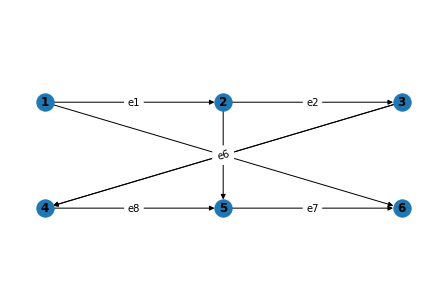

In [306]:
nx.draw(G, with_labels=True, font_weight='bold', pos=nx.bipartite_layout(G, nodes=([1, 2, 3]), center=([1,6]), align='horizontal', 
                                                                        aspect_ratio=200), label="123")

edge_label = nx.draw_networkx_edge_labels(G, pos=nx.bipartite_layout(G, nodes=([1, 2, 3]), center=([1,6]), align='horizontal', 
                                                                        aspect_ratio=200), edge_labels=egde_labels_short)

## Ex1: incidence matrix

In this configuration, the negative sign represents edges leaving

rows = nodes, </b>
columns = edges

In [314]:
incidence_mat = nx.incidence_matrix(G, oriented=True)

incidence_df = pd.DataFrame(incidence_mat.todense())
print(incidence_mat.todense())

[[-1. -1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1. -1.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -1.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.]]


In [345]:
columns = list(egde_labels_short.values())
columns.insert(4, "e5")
incidence_df.columns = columns
incidence_df.index = ["V1", "V2", "V3", "V4", "V5", "V6"]
incidence_df

,e1,e3,e2,e4,e5,e6,e8,e7
V1,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
V2,1.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
V3,0.0,0.0,1.0,0.0,-1.0,-1.0,0.0,0.0
V4,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0
V5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0
V6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
